# Our first Neural Network
Train a generic MLP as binary classifier of protein-coding/non-coding RNA.

In [54]:
import numpy as np
import pandas as pd

## K-mer frequency, K=2

In [55]:
nc2 = pd.read_csv ('ncRNA.2mer.features.csv')
pc2 = pd.read_csv ('pcRNA.2mer.features.csv')
nc2['class']=0
pc2['class']=1
rna2mer=pd.concat((nc2,pc2),axis=0)
rna2mer

,seqnum,seqlen,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,GG,GT,TA,TC,TG,TT,class
0,1,535,39,21,38,30,31,48,11,44,31,30,26,28,27,36,40,54,0
1,2,590,37,21,47,27,43,55,9,51,35,42,55,26,18,40,46,37,0
2,3,629,61,30,53,41,48,41,5,45,48,30,31,32,28,38,51,46,0
3,4,1319,109,68,127,77,110,75,16,82,106,79,100,58,57,61,100,93,0
4,5,323,16,21,26,12,28,23,4,21,24,23,31,19,7,9,37,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20147,20148,297,17,24,13,29,22,28,6,36,5,18,6,7,39,22,11,13,1
20148,20149,1378,118,152,47,99,142,147,31,153,36,55,25,21,119,119,34,79,1
20149,20150,1812,170,166,82,132,190,212,40,180,48,81,30,33,142,163,40,102,1
20150,20151,525,18,5,34,46,5,4,8,20,34,13,80,59,45,15,65,73,1


In [56]:
# Split into train/test stratified by sequence length.
def sizebin(df):
    return pd.cut(df["seqlen"],
                              bins=[0,1000,2000,4000,8000,16000,np.inf],
                              labels=[0,1,2,3,4,5])
bin_labels= sizebin(rna2mer)
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=37863)
# split(x,y) expects that y is the labels. 
# Trick: Instead of y, give it it the bin labels that we generated.
for train_index,test_index in splitter.split(rna2mer,bin_labels):
    train_set = rna2mer.iloc[train_index]
    test_set = rna2mer.iloc[test_index]

,seqnum,seqlen,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,GG,GT,TA,TC,TG,TT,class
1280,1281,348,27,16,30,25,26,19,3,16,27,11,25,21,18,18,26,39,0
9088,9089,534,60,24,44,25,43,41,8,40,29,36,47,24,22,30,37,23,0
6069,6070,592,44,34,63,25,50,39,19,27,55,32,65,32,16,30,38,22,1
18549,18550,945,72,46,70,48,52,43,65,38,85,61,83,66,28,48,76,63,1
15027,15028,4382,177,222,310,108,298,515,368,278,270,483,467,177,73,239,251,145,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3386,3387,578,74,24,35,59,35,15,3,22,31,18,20,41,52,18,53,77,0
6495,6496,562,44,23,52,33,44,36,4,39,44,30,40,24,19,34,42,53,0
6409,6410,740,52,32,80,31,50,43,23,48,61,49,99,32,32,40,39,28,1
7640,7641,3156,206,187,230,165,259,280,78,230,223,182,230,144,100,198,241,202,1


In [71]:
y_train_all=  train_set[['class']].copy()
X_train_all=  train_set.div(train_set['seqlen'],axis=0)
X_train_all=  X_train_all.drop(columns=['class','seqnum','seqlen'])

y_test=   test_set[['class']].copy()
X_test=   test_set.div(test_set['seqlen'],axis=0)
X_test=   X_test.drop(columns=['class','seqnum','seqlen'])

X_train,y_train=X_train_all[:25000],y_train_all[:25000]
X_valid,y_valid=X_train_all[25000:],y_train_all[25000:]

X_train

,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,GG,GT,TA,TC,TG,TT
1280,0.077586,0.045977,0.086207,0.071839,0.074713,0.054598,0.008621,0.045977,0.077586,0.031609,0.071839,0.060345,0.051724,0.051724,0.074713,0.112069
9088,0.112360,0.044944,0.082397,0.046816,0.080524,0.076779,0.014981,0.074906,0.054307,0.067416,0.088015,0.044944,0.041199,0.056180,0.069288,0.043071
6069,0.074324,0.057432,0.106419,0.042230,0.084459,0.065878,0.032095,0.045608,0.092905,0.054054,0.109797,0.054054,0.027027,0.050676,0.064189,0.037162
18549,0.076190,0.048677,0.074074,0.050794,0.055026,0.045503,0.068783,0.040212,0.089947,0.064550,0.087831,0.069841,0.029630,0.050794,0.080423,0.066667
15027,0.040393,0.050662,0.070744,0.024646,0.068005,0.117526,0.083980,0.063441,0.061616,0.110224,0.106572,0.040393,0.016659,0.054541,0.057280,0.033090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389,0.081042,0.044863,0.081766,0.065123,0.062952,0.047757,0.008683,0.086831,0.070188,0.052098,0.054993,0.044139,0.058611,0.061505,0.075977,0.102750
10178,0.071706,0.046963,0.074035,0.058607,0.075393,0.062973,0.017854,0.075878,0.062488,0.059189,0.077237,0.053852,0.041820,0.062876,0.083641,0.075393
11158,0.081213,0.057730,0.088063,0.053816,0.100783,0.064579,0.018591,0.072407,0.075342,0.074364,0.068493,0.037182,0.023483,0.059687,0.079256,0.044031
5030,0.099089,0.045558,0.087699,0.055809,0.056948,0.055809,0.026196,0.076310,0.085421,0.060364,0.071754,0.043280,0.046697,0.053531,0.075171,0.059226


In [72]:
# Just check that one value (top left) comes out as expected.
kmer_count=train_set.iloc[0].loc['AA']
seqlen=train_set.iloc[0].loc['seqlen']
expected_value=kmer_count/seqlen
X_train.iloc[0].loc['AA'] == expected_value

True

In [80]:
# Geron Chapter 10
import tensorflow as tf
from tensorflow import keras
tf.keras.backend.set_floatx('float64')
                            
# We tried all these. No difference.
act="relu" 
act="tanh"
act="sigmoid"

# Adding non-trained Layer Normalization improved accuracy a tiny bit sometimes.
# Adding multiple dense layers only hurt.
mlp2 = keras.models.Sequential([
    keras.layers.LayerNormalization(trainable=False),
    keras.layers.Dense(32, activation=act,dtype='float32'),
    keras.layers.Dense(1,  activation=act,dtype='float32')
])
# Error:
# ValueError: logits and labels must have the same shape ((None, 2) vs (None, 1))
# This was because the output layer had 2 nodes (0 and 1) not 1 (binary).

In [83]:
# See page 302 for explanation of these parameters.
# See also the keras docs e.g. 
# https://www.tensorflow.org/api_docs/python/tf/keras/losses/sparse_categorical_crossentropy
# Note keras can take parameters for % train vs % validation.

# It seems the BinaryCrossentropy assumes labels are probabilities.
# Instead of loss="binary_crossentropy",
bc=tf.keras.losses.BinaryCrossentropy(from_logits=False)
# Tried optimizers SGD, Adam
mlp2.compile(loss=bc, optimizer="Adam",metrics=["accuracy"])

# With one dense layer and Adam optimizer, accuracy increases slowly.
history = mlp2.fit(X_train,y_train,epochs=50,validation_data=(X_valid,y_valid))

Epoch 1/50
782/782 [==============================] - 2s 3ms/step - loss: 0.5104 - accuracy: 0.7534 - val_loss: 0.5160 - val_accuracy: 0.7537
Epoch 2/50
782/782 [==============================] - 2s 3ms/step - loss: 0.5099 - accuracy: 0.7545 - val_loss: 0.5146 - val_accuracy: 0.7529
Epoch 3/50
782/782 [==============================] - 2s 2ms/step - loss: 0.5089 - accuracy: 0.7548 - val_loss: 0.5105 - val_accuracy: 0.7556
Epoch 4/50
782/782 [==============================] - 2s 3ms/step - loss: 0.5095 - accuracy: 0.7530 - val_loss: 0.5095 - val_accuracy: 0.7556
Epoch 5/50
782/782 [==============================] - 2s 3ms/step - loss: 0.5068 - accuracy: 0.7563 - val_loss: 0.5108 - val_accuracy: 0.7567
Epoch 6/50
782/782 [==============================] - 2s 3ms/step - loss: 0.5066 - accuracy: 0.7570 - val_loss: 0.5139 - val_accuracy: 0.7548
Epoch 7/50
782/782 [==============================] - 2s 3ms/step - loss: 0.5065 - accuracy: 0.7558 - val_loss: 0.5076 - val_accuracy: 0.7565
Epoch 

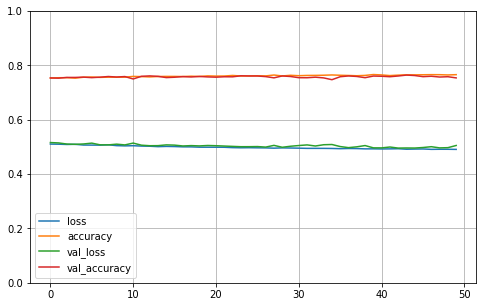

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## K-mer frequency, K=3

In [86]:
nc3 = pd.read_csv ('ncRNA.3mer.features.csv')
pc3 = pd.read_csv ('pcRNA.3mer.features.csv')
nc3['class']=0
pc3['class']=1
rna3mer=pd.concat((nc3,pc3),axis=0)
bin_labels= sizebin(rna3mer)
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=37863)
for train_index,test_index in splitter.split(rna3mer,bin_labels):
    train_set = rna3mer.iloc[train_index]
    test_set =  rna3mer.iloc[test_index]
y_train_all=  train_set[['class']].copy()
X_train_all=  train_set.div(train_set['seqlen'],axis=0)
X_train_all=  X_train_all.drop(columns=['class','seqnum','seqlen'])
y_test=   test_set[['class']].copy()
X_test=   test_set.div(test_set['seqlen'],axis=0)
X_test=   X_test.drop(columns=['class','seqnum','seqlen'])
X_train,y_train=X_train_all[:25000],y_train_all[:25000]
X_valid,y_valid=X_train_all[25000:],y_train_all[25000:]

In [87]:
act="sigmoid"
mlp2 = keras.models.Sequential([
    keras.layers.LayerNormalization(trainable=False),
    keras.layers.Dense(32, activation=act,dtype='float32'),
    keras.layers.Dense(1,  activation=act,dtype='float32')
])
bc=tf.keras.losses.BinaryCrossentropy(from_logits=False)
mlp2.compile(loss=bc, optimizer="Adam",metrics=["accuracy"])
history = mlp2.fit(X_train,y_train,epochs=50,validation_data=(X_valid,y_valid))

Epoch 1/50
782/782 [==============================] - 2s 3ms/step - loss: 0.5905 - accuracy: 0.6864 - val_loss: 0.5363 - val_accuracy: 0.7452
Epoch 2/50
782/782 [==============================] - 2s 2ms/step - loss: 0.5180 - accuracy: 0.7529 - val_loss: 0.5067 - val_accuracy: 0.7546
Epoch 3/50
782/782 [==============================] - 2s 2ms/step - loss: 0.5013 - accuracy: 0.7612 - val_loss: 0.4974 - val_accuracy: 0.7614
Epoch 4/50
782/782 [==============================] - 2s 2ms/step - loss: 0.4953 - accuracy: 0.7656 - val_loss: 0.4979 - val_accuracy: 0.7618
Epoch 5/50
782/782 [==============================] - 3s 3ms/step - loss: 0.4927 - accuracy: 0.7654 - val_loss: 0.4938 - val_accuracy: 0.7662
Epoch 6/50
782/782 [==============================] - 2s 3ms/step - loss: 0.4902 - accuracy: 0.7669 - val_loss: 0.4930 - val_accuracy: 0.7620
Epoch 7/50
782/782 [==============================] - 2s 3ms/step - loss: 0.4873 - accuracy: 0.7669 - val_loss: 0.4901 - val_accuracy: 0.7654
Epoch 

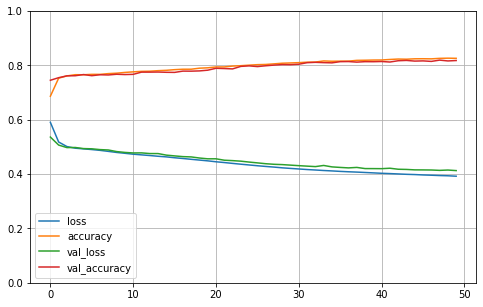

In [88]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()